In [ ]:
from utils.config import DATASETS
from eeg_analyzer.subject import Subject
from eeg_analyzer.metrics import Metrics

dataset = DATASETS["touryan2022"]
subject = Subject(dataset_config=dataset, subject_id="04")
print(subject.group)
subject.load_data()  # All recordings auto-discovered and loaded

recording = subject.get_recording(session_id=2)
psd_mw = recording.get_psd(task="collision", state="MW")
freqs_mw = recording.get_freqs(task="collision", state="MW")

alpha_power_MW = Metrics.alpha_power(psd_mw, freqs_mw)
mean_alpha_power_MW = Metrics.mean_power(alpha_power_MW)
alpha_db_MW = Metrics.to_db(alpha_power_MW)
mean_alpha_db_MW = Metrics.mean_power(alpha_db_MW)

psd_OT = recording.get_psd(task="collision", state="OT")
freqs_OT = recording.get_freqs(task="collision", state="OT")

alpha_power_OT = Metrics.alpha_power(psd_OT, freqs_OT)
mean_alpha_power_OT = Metrics.mean_power(alpha_power_OT)
alpha_db_OT = Metrics.to_db(alpha_power_OT)
mean_alpha_db_OT = Metrics.mean_power(alpha_db_OT)

mean_alpha_power_diff = mean_alpha_power_OT - mean_alpha_power_MW
mean_alpha_db_diff = mean_alpha_db_OT - mean_alpha_db_MW




ctr


AttributeError: 'NoneType' object has no attribute 'get_psd'

In [6]:
from utils.config import DATASETS
from eeg_analyzer.subject import Subject
from eeg_analyzer.metrics import Metrics

dataset = DATASETS["braboszcz2017"]
subject = Subject(dataset_config=dataset, subject_id="025")
subject.load_data()

rec = subject.get_recording(session_id=1)
print(rec.get_num_epochs())

subject.get_epochs_per_condition()

subject.get_state_ratio()

# do the same for dataset "touryan2022"
dataset = DATASETS["touryan2022"]
subject = Subject(dataset_config=dataset, subject_id="03")
subject.load_data()

rec = subject.get_recording(session_id=2)
print(rec.get_num_epochs())

subject.get_epochs_per_condition()

subject.get_state_ratio()


{('med2', 'OT'): 118, ('think2', 'MW'): 119}
{('police_detection', 'OT'): 18, ('collision', 'MW'): 2, ('collision', 'OT'): 2}


0.1

In [8]:
from utils.config import DATASETS
from eeg_analyzer.subject import Subject
from eeg_analyzer.metrics import Metrics

dataset = DATASETS["jin2019"]
subject = Subject(dataset_config=dataset, subject_id="1")
subject.load_data()

rec = subject.get_recording(session_id=1)
print(rec.get_num_epochs())

rec = subject.get_recording(session_id=2)
print(rec.get_num_epochs())

subject.get_epochs_per_condition()

{('vs', 'MW'): 227, ('vs', 'OT'): 52, ('sart', 'MW'): 67, ('sart', 'OT'): 48}
{('vs', 'MW'): 170, ('vs', 'OT'): 19, ('sart', 'MW'): 1, ('sart', 'OT'): 34}


{('vs', 'MW'): 397, ('vs', 'OT'): 71, ('sart', 'MW'): 68, ('sart', 'OT'): 82}

In [ ]:
# Example usage
from eeg_analyzer.dataset import Dataset
from utils.config import DATASETS

dataset_config = DATASETS["braboszcz2017"]
dataset = Dataset(dataset_config)

sub = dataset.get_subject(subject_id="025")

Dataset Name: Braboszcz et al. (2017)
Subjects: ['025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078']
Groups: {'vip', 'ctr'}
Tasks: ['med2', 'think2']
States: ['MW', 'OT']
Task orientation: internal


# Visualizing Alpha Power by State and Task
This section uses the `Visualizer` class to plot alpha power for the subject's recording across states and tasks.

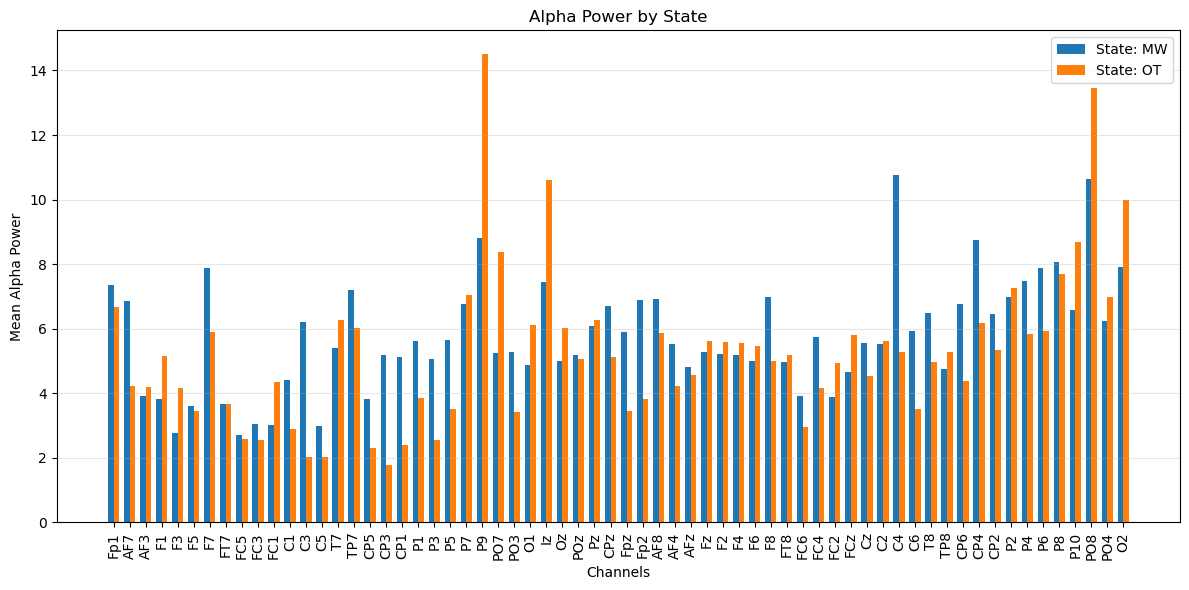

In [2]:
from eeg_analyzer.visualizer import Visualizer

# Prepare alpha power data by state
alpha_power_by_state = {
    "MW": alpha_power_MW,
    "OT": alpha_power_OT
}

# Plot alpha power by state
Visualizer.plot_alpha_power_by_state(alpha_power=alpha_power_by_state,
                                     states=["MW", "OT"],
                                     channels=recording.channels)

In [ ]:
# Prepare alpha power data by task
alpha_power_by_task = {
    "collision": alpha_power_MW,  # Example: Using MW alpha power for 'collision' task
    "police_detection": alpha_power_OT  # Example: Using OT alpha power for 'police_detection' task
}

# Plot alpha power by task
Visualizer.plot_alpha_power_by_task(alpha_power=alpha_power_by_task,
                                    tasks=["collision", "police_detection"],
                                    channels=recording.channels)

### **TESTING STATISTIC MEASURES USING EEGAnalyzer Class**

In [1]:
from utils.config import DATASETS
from eeg_analyzer.eeg_analyzer import EEGAnalyzer

eeg = EEGAnalyzer(DATASETS)

print(eeg)

eeg.create_dataframe()

[EEGAnalyzer - Akbar] EEGAnalyzer instance 'Akbar' (randomly named): Created new derivatives directory at /home/sivert/Documents/Master_AttentionalDirectionResearch/data/eeg_analyzer_derivatives/Akbar
[EEGAnalyzer - Akbar] Loaded dataset: braboszcz2017 with 50 subjects.
[EEGAnalyzer - Akbar] Loaded dataset: jin2019 with 30 subjects.
[EEGAnalyzer - Akbar] Loaded dataset: touryan2022 with 20 subjects.
--- EEGAnalyzer Instance: 'Akbar' ---
  Description: No description provided for this EEGAnalyzer instance.
  Datasets (3): braboszcz2017, jin2019, touryan2022
  DataFrame Status: No DataFrame
  Derivatives Path: /home/sivert/Documents/Master_AttentionalDirectionResearch/data/eeg_analyzer_derivatives/Akbar
--------------------------------------
[EEGAnalyzer - Akbar] Creating DataFrame from datasets...
[EEGAnalyzer - Akbar] Processing dataset: braboszcz2017
[EEGAnalyzer - Akbar] Processing dataset: jin2019
[EEGAnalyzer - Akbar] Processing dataset: touryan2022
[EEGAnalyzer - Akbar] DataFrame 

,dataset,subject_session,subject_id,session_id,group,epoch_idx,channel,cortical_region,hemisphere,task,task_orientation,state,band_power,band_db,is_bad
0,braboszcz2017,025_1,025,1,ctr,0,Fp1,prefrontal,left,med2,internal,OT,2.610979,-117.355758,False
1,braboszcz2017,025_1,025,1,ctr,0,AF7,prefrontal,left,med2,internal,OT,2.169039,-118.002886,False
2,braboszcz2017,025_1,025,1,ctr,0,AF3,prefrontal,left,med2,internal,OT,3.010984,-116.685369,False
3,braboszcz2017,025_1,025,1,ctr,0,F1,frontal,left,med2,internal,OT,4.125600,-115.440382,False
4,braboszcz2017,025_1,025,1,ctr,0,F3,frontal,left,med2,internal,OT,3.295738,-115.990553,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996283,touryan2022,21_2,21,2,None,18,P8,parietal,right,collision,external,OT,0.933682,-120.332949,False
1996284,touryan2022,21_2,21,2,None,18,P10,temporal,right,collision,external,OT,0.802293,-121.053001,False
1996285,touryan2022,21_2,21,2,None,18,PO8,parietooccipital,right,collision,external,OT,1.099192,-119.710881,False
1996286,touryan2022,21_2,21,2,None,18,PO4,parietooccipital,right,collision,external,OT,1.495267,-118.390526,False


,dataset,subject_session,subject_id,session_id,group,epoch_idx,channel,cortical_region,hemisphere,task,state,band_power,is_bad
0,braboszcz2017,025_1,025,1,ctr,0,Fp1,prefrontal,left,med2,0,23.498810,False
1,braboszcz2017,025_1,025,1,ctr,0,AF7,prefrontal,left,med2,0,19.521354,False
2,braboszcz2017,025_1,025,1,ctr,0,AF3,prefrontal,left,med2,0,27.098857,False
3,braboszcz2017,025_1,025,1,ctr,0,F1,frontal,left,med2,0,37.130399,False
4,braboszcz2017,025_1,025,1,ctr,0,F3,frontal,left,med2,0,29.661644,False
